In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.cluster import AgglomerativeClustering

#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

# libraries for computation
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor


from sklearn.cluster import KMeans

#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [5]:
def plotConfusion(cm):
    sns.set_style('white')
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
    classNames = ['Developed','Developing']
    plt.title('Confusion Matrix',fontsize = 15)
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames,fontsize=12)
    plt.yticks(tick_marks, classNames,fontsize=12)
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

### Read Data from CSV

In [9]:
data = pd.read_csv('UNdata_Univariant_Education.csv',error_bad_lines=False)

b'Skipping line 207: expected 3 fields, saw 4\nSkipping line 208: expected 3 fields, saw 4\nSkipping line 209: expected 3 fields, saw 4\nSkipping line 210: expected 3 fields, saw 4\nSkipping line 211: expected 3 fields, saw 4\nSkipping line 212: expected 3 fields, saw 4\nSkipping line 213: expected 3 fields, saw 4\nSkipping line 214: expected 3 fields, saw 4\nSkipping line 215: expected 3 fields, saw 4\nSkipping line 216: expected 3 fields, saw 4\nSkipping line 217: expected 3 fields, saw 4\nSkipping line 218: expected 3 fields, saw 4\nSkipping line 219: expected 3 fields, saw 4\nSkipping line 220: expected 3 fields, saw 4\nSkipping line 221: expected 3 fields, saw 4\nSkipping line 222: expected 3 fields, saw 4\nSkipping line 223: expected 3 fields, saw 4\nSkipping line 224: expected 3 fields, saw 4\nSkipping line 225: expected 3 fields, saw 4\nSkipping line 226: expected 3 fields, saw 4\nSkipping line 227: expected 3 fields, saw 4\nSkipping line 228: expected 3 fields, saw 4\nSkipping

In [10]:
data.head()

,Country,Year,Total Literate
0,Albania,2001,5388246.00
1,Albania,2011,4774818.00
2,Algeria,1998,34574646.00
3,Algeria,2008,43025412.67
4,Argentina,2001,57345216.00


In [11]:
data.shape

(205, 3)

#### Get data insights

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
Country           205 non-null object
Year              205 non-null int64
Total Literate    205 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.9+ KB


In [14]:
data['Country'].nunique()

127

### Lets normalize data

In [16]:
# Normalize the value column and drop old column

# Create x, where x the 'Total Men and Women Employed' column's values as floats
x = data[['Total Literate']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized['normalized'] = pd.DataFrame(x_scaled)
df_normalized.drop(columns=0,inplace=True)

data_new = pd.concat([data,df_normalized ], axis=1)
data_new.drop(columns='Total Literate',inplace=True)

In [17]:
# Check new dataframe with normalized value
data_new.head()

,Country,Year,normalized
0,Albania,2001,0.002548
1,Albania,2011,0.002258
2,Algeria,1998,0.016350
3,Algeria,2008,0.020347
4,Argentina,2001,0.027119


In [18]:
data_new['Country'].nunique()

127

#### Using tsfresh to extract features from data

In [19]:
# Use TSFresh library to extract features from data 
from tsfresh import extract_features
extracted_features = extract_features(data_new, column_id="Country", column_sort="Year")

Feature Extraction: 100%|██████████| 10/10 [00:05<00:00,  2.00it/s]


In [20]:
#Check extracted features
extracted_features.head()

variable,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,normalized__time_reversal_asymmetry_statistic__lag_1,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
Albania,1.159163e-05,0.000290,-1.0,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.103841e-08,0.0
Algeria,6.813340e-04,0.003996,-1.0,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.992803e-06,0.0
Argentina,1.695395e-03,0.003865,-1.0,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.733718e-06,0.0
Armenia,1.287773e-05,0.000115,-1.0,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.326665e-09,0.0
Aruba,5.567465e-09,0.000027,-1.0,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.856374e-10,0.0


In [21]:
#Check shape of new data with extracted features
extracted_features.shape

(127, 794)

In [22]:
#Check if any columns contains Nan values (null values)
list_cols_with_nan = extracted_features.columns[extracted_features.isna().any()].tolist()
len(list_cols_with_nan)

568

In [23]:
# it seems 369 columns out of 794 have some null values

In [24]:
#lets replace nan value with 0.0
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
data_after_impute = impute(extracted_features)

 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"rvalue"'
 'normalized__agg_linear_trend__f_

In [25]:
#lets check if any column has any nan value
list_cols_with_nan_after_impute = data_after_impute.columns[data_after_impute.isna().any()].tolist()
len(list_cols_with_nan_after_impute)

0

In [26]:
#we dont have any nan values 
# lets reset the index
data_after_impute = data_after_impute.reset_index()
data_after_impute.shape

(127, 795)

In [27]:
# we need to give labels to countries 
data_countries = pd.read_excel('Developing countries.xlsx')

developed_countries = data_countries [data_countries['Value'] == 0]
developing_countries = data_countries [data_countries['Value'] == 1] 

list_developed_countries = developed_countries['Countries']
list_developing_countries = developing_countries['Countries']

list_developed_countries = list(list_developed_countries)
list_developing_countries = list(list_developing_countries)

data_after_impute['label'] = -1

for i,da in data_after_impute.iterrows():
    if da['id'] in list_developed_countries:
        val = 0
        data_after_impute.at[i,'label'] = val
    elif da['id'] not in list_developed_countries:
        val = 1
        data_after_impute.at[i,'label'] = val

In [28]:
# check new df with added column as label 
data_after_impute.head()

variable,id,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation,label
0,Albania,1.159163e-05,0.000290,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.103841e-08,0.0,1
1,Algeria,6.813340e-04,0.003996,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.992803e-06,0.0,1
2,Argentina,1.695395e-03,0.003865,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.733718e-06,0.0,1
3,Armenia,1.287773e-05,0.000115,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.326665e-09,0.0,1
4,Aruba,5.567465e-09,0.000027,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.856374e-10,0.0,1


In [29]:
#data_after_impute.to_csv('Gdp-output.csv')

In [30]:
#Split data into X(features),y 
y = data_after_impute['label']
X = data_after_impute.drop(columns=['id','label'])

In [31]:
y.value_counts()

1    113
0     14
Name: label, dtype: int64

In [32]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [33]:
y_test.value_counts()

1    45
0     6
Name: label, dtype: int64

#### Lets try different classifiers on the data

###### KNN with k ranging from 1 to 15

[0.8672530377751793, 0.8381338742393509, 0.8980431333372509, 0.9215686274509803, 0.9215686274509803, 0.8590971272229823, 0.8590971272229823, 0.8590971272229823, 0.8272058823529411, 0.8272058823529411, 0.8272058823529411, 0.8272058823529411, 0.8272058823529411, 0.8272058823529411, 0.8272058823529411]


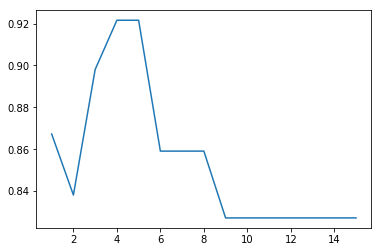

In [34]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,scores)    
print(scores)  

#### lets Evaluate KNN Model
You can see that we are getting best f1 score ** 0.7647 ** with **k = 5.** Lets set k and check classfication report and Confusion matrix for same.

             precision    recall  f1-score   support

          0       0.67      0.67      0.67         6
          1       0.96      0.96      0.96        45

avg / total       0.92      0.92      0.92        51

F1 Score:  0.9215686274509803
Accuracy is:  0.9215686274509803


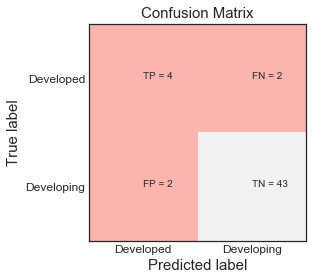

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
print(dsf)
f1 = f1_score(y_test,pred,average='weighted') 
print('F1 Score: ',f1)
acc = accuracy_score(y_test,pred)
print('Accuracy is: ',acc)
plotConfusion(confusion_matrix(y_test,pred))

#### Random Forest Classifier

In [36]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8293253342823732
Accuracy Score:  0.8235294117647058


#### Fine tuninng Random Forest for different number of estimators

[0.8420830697870547,
 0.8293253342823732,
 0.8164776400070518,
 0.8431372549019608,
 0.8164776400070518,
 0.8164776400070518,
 0.8164776400070518,
 0.7969639468690701,
 0.7969639468690701,
 0.8164776400070518,
 0.8164776400070518,
 0.8164776400070518]

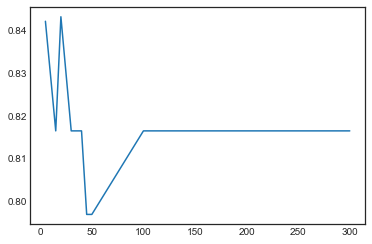

In [37]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
f1_scores

#### Lets fine tune for number of features with best number of estimator from above analysis

In [38]:
rf_classifier = RandomForestClassifier(n_estimators=5, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8420830697870547
Accuracy Score:  0.8627450980392157


[0.8164776400070518, 0.7864450127877238, 0.7969639468690701, 0.8173374613003096, 0.7969639468690701, 0.8431372549019608, 0.8572603866721513, 0.8164776400070518, 0.829156010230179, 0.8164776400070518, 0.829156010230179]


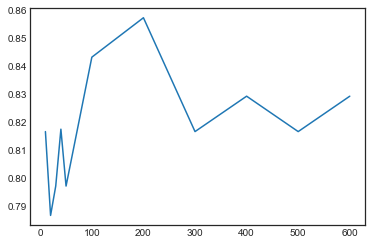

In [39]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    rf_classifier = RandomForestClassifier(max_features = e ,n_estimators=5,random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

In [40]:
rf_classifier = RandomForestClassifier(n_estimators=5,max_features=200, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
cr = classification_report(y_test,pred)
cm = confusion_matrix(y_test,pred)


F1 Score:  0.8572603866721513
Accuracy Score:  0.8627450980392157


#### This is the best combination we got for RFC lets evaluate it

             precision    recall  f1-score   support

          0       0.40      0.33      0.36         6
          1       0.91      0.93      0.92        45

avg / total       0.85      0.86      0.86        51



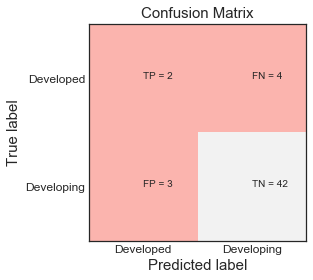

In [41]:
print(cr)
plotConfusion(cm)

#### Logistic regression model

In [42]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8723404255319149
Accuracy Score:  0.8723404255319149


#### Extra tree classifier

In [43]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=5,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9016763378465505
Accuracy Score:  0.9148936170212766


[0.9016763378465505, 0.8742316784869977, 0.9180970595266554, 0.8742316784869977, 0.9180970595266554, 0.8742316784869977, 0.9180970595266554, 0.8742316784869977, 0.8742316784869977, 0.9180970595266554, 0.9180970595266554, 0.9180970595266554]


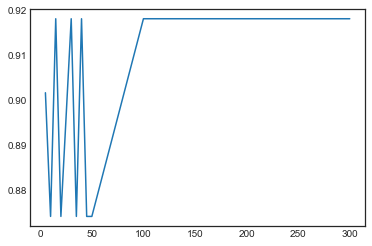

In [44]:
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [45]:
model = ExtraTreesClassifier(n_estimators=40,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9180970595266554
Accuracy Score:  0.9361702127659575


#### fine tune for max_features

[0.9180970595266554, 0.9180970595266554, 0.9180970595266554, 0.9180970595266554, 0.9180970595266554, 0.9180970595266554, 0.9180970595266554, 0.9180970595266554, 0.9180970595266554, 0.9180970595266554, 0.9180970595266554, 0.9180970595266554, 0.9180970595266554, 0.9180970595266554]


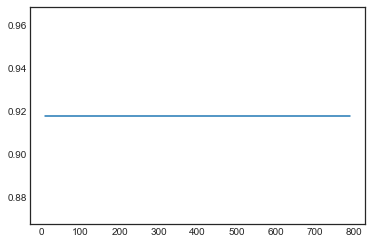

In [46]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600,700,750,790]
f1_scores = []
for e in no_of_features:
    model = ExtraTreesClassifier(max_features=e,n_estimators=40,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

In [47]:
model = ExtraTreesClassifier(n_estimators=50,max_features=790,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
cr = classification_report(y_test,pred)
cm = confusion_matrix(y_test,pred)

F1 Score:  0.9180970595266554
Accuracy Score:  0.9361702127659575


             precision    recall  f1-score   support

          0       1.00      0.25      0.40         4
          1       0.93      1.00      0.97        43

avg / total       0.94      0.94      0.92        47



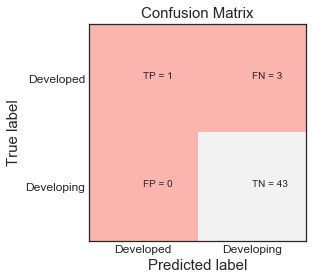

In [48]:
print(cr)
plotConfusion(cm)

#### Recursive Feature Elimination 

In [49]:
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 786
Best features : Index(['normalized__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"',
       'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"',
       'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"',
       'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"',
       'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"',
       'normalized__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"intercept"',
       'normalized__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"rvalue"',
       'normalized__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"slope"',
       'normalized__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"stderr"',
       'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"intercept"',
       ...
       'normalized__time_reversal_asymmetry_statistic__lag_1',
       'normalized__time_reversal_asymmetry_statistic__lag_2',


In [69]:
cols = X_train.columns[rfecv.support_]

In [70]:
X = X[cols]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [72]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

          0       0.67      0.13      0.22        15
          1       0.81      0.98      0.89        57

avg / total       0.78      0.81      0.75        72

Accuracy is:  0.8055555555555556


[0.75, 0.6666666666666666, 0.7777777777777778, 0.75, 0.8055555555555556, 0.7777777777777778, 0.8055555555555556, 0.7916666666666666, 0.8055555555555556, 0.8055555555555556, 0.8055555555555556, 0.8055555555555556, 0.8055555555555556, 0.7777777777777778, 0.7916666666666666]


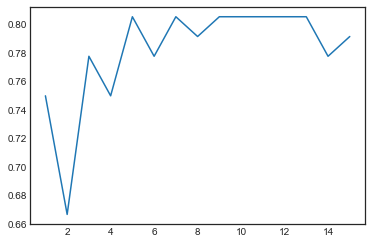

In [73]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores) 

[0.8472222222222223, 0.8651260504201681, 0.8283926218708828, 0.8404123199205166, 0.8200735578784357, 0.8200735578784357, 0.8200735578784357, 0.8319892473118279, 0.852787456445993, 0.8723298559364134, 0.8723298559364134, 0.8723298559364134]


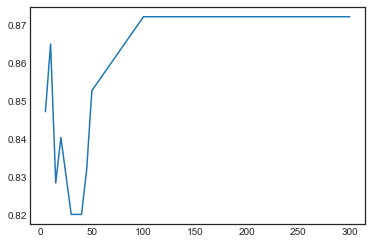

In [74]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [50]:
rf_classifier = RandomForestClassifier(n_estimators=150, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

          0       1.00      0.25      0.40         4
          1       0.93      1.00      0.97        43

avg / total       0.94      0.94      0.92        47

Accuracy is:  0.9361702127659575


In [51]:
# We obtained best results without Feature selection RFE

##### Lets Try Clustering 

In [52]:
y = data_after_impute['label']
X = data_after_impute.drop(columns=['id','label'])

             precision    recall  f1-score   support

          0       0.04      0.83      0.08         6
          1       0.67      0.02      0.04       111

avg / total       0.63      0.06      0.04       117



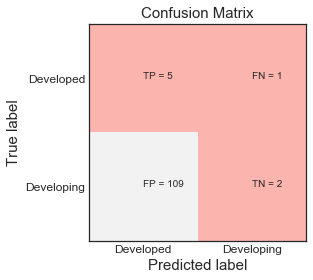

In [53]:
model = KMeans(n_clusters=2,n_init=400,random_state=42,max_iter=1000)
model.fit(X)
y_pred = model.labels_
y_arr = np.array(y)
accuracy_score(y_arr,y_pred)
print(classification_report(y_arr,y_pred))
plotConfusion(confusion_matrix(y_arr,y_pred))

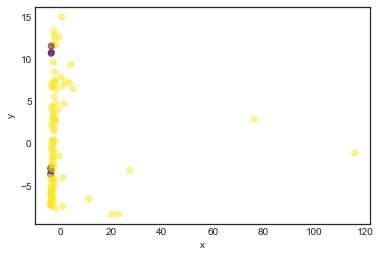

In [54]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(scaled_df)  
df = pd.DataFrame(X_pca)
df.head()
a = df[0]
b = df [1]
plt.scatter(a,b,alpha=0.5,c=y,cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       0.95      0.98      0.96       111

avg / total       0.90      0.93      0.92       117



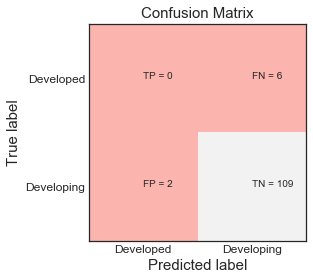

In [55]:
model = KMeans(n_clusters=2,n_init=100,random_state=42,precompute_distances=True,max_iter=1000)
model.fit(X_pca)
y_pred = model.labels_
accuracy_score(y_arr,y_pred)
print(classification_report(y_arr,y_pred))
plotConfusion(confusion_matrix(y_arr,y_pred))

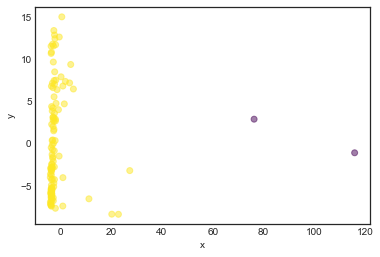

In [56]:
plt.scatter(a,b,alpha=0.5,c=y_pred,cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

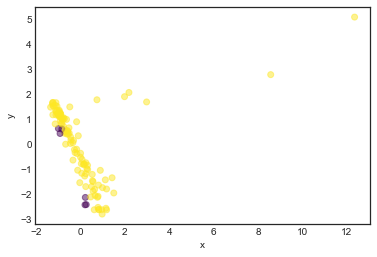

In [57]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(scaled_df)  
df = pd.DataFrame(X_pca)
df.head()
a = df[0]
b = df [1]
plt.scatter(a,b,alpha=0.5,c=y,cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       0.95      0.98      0.96       111

avg / total       0.90      0.93      0.92       117



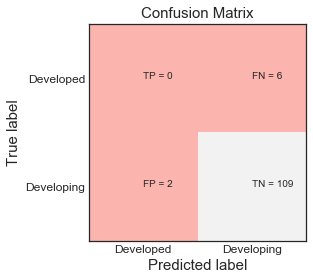

In [59]:
model = KMeans(n_clusters=2,n_init=100,random_state=42,precompute_distances=True,max_iter=1000)
model.fit(X_pca)
y_pred = model.labels_
accuracy_score(y_arr,y_pred)
print(classification_report(y_arr,y_pred))
plotConfusion(confusion_matrix(y_arr,y_pred))

In [60]:
def testFunctions(dimensions,scaled_df,y_arr):
    pca = PCA(n_components=dimensions)  
    X_pca = pca.fit_transform(scaled_df)
    model = KMeans(n_clusters=2,n_init=100,random_state=42,precompute_distances=True,max_iter=1000)
    model.fit(X_pca)
    y_pred = model.labels_
    score = f1_score(y_pred,y_arr,average='weighted')
    return score

[0.948112850767718, 0.948112850767718, 0.948112850767718, 0.948112850767718, 0.948112850767718, 0.948112850767718, 0.948112850767718, 0.948112850767718, 0.948112850767718, 0.948112850767718, 0.948112850767718, 0.948112850767718, 0.948112850767718, 0.948112850767718, 0.948112850767718]


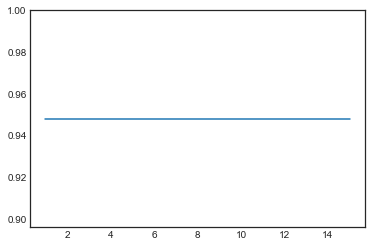

In [61]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)

dimensions_ = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []
for dim in dimensions_:
    scores.append(testFunctions(dim,scaled_df,y_arr))

plt.plot(dimensions_,scores)    
print(scores)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       0.95      0.98      0.96       111

avg / total       0.90      0.93      0.92       117



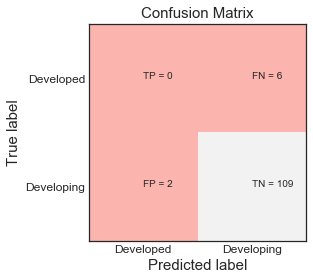

In [62]:
pca = PCA(n_components=14)  
X_pca = pca.fit_transform(scaled_df)
model = KMeans(n_clusters=2,n_init=100,random_state=42,precompute_distances=True,max_iter=1000)
model.fit(X_pca)
y_pred = model.labels_
print(classification_report(y_arr,y_pred))
plotConfusion(confusion_matrix(y_arr,y_pred))